## Fixing Percentages add to more than 100 bug

In [13]:
coral_percent = float(33)/100
algae_percent = float(65)/100
turf_percent = round(1 - coral_percent - algae_percent, 2)

print(coral_percent,algae_percent,turf_percent)

0.33 0.65 0.02


In [ ]:
coral_percent = float(33)/100
algae_percent = float(67)/100
turf_percent = 1 - coral_percent - algae_percent

print(coral_percent,algae_percent,turf_percent)

## Determining graphical coral model outputs

In [1]:
import pandas as pd

In [2]:
coralData = pd.read_csv('table.csv')
coralData

,Simulation,Timestep,CoralCount,TurfCount,MacroalgaeCount,Coral-CoralNeighbors,Turf-TurfNeighbors,Macro-MacroNeighbors,CoralPatchCount,AlgaePatchCount,TurfPatchCount,MacroPatchCount
0,0,0,51,78,96,0.20,0.37,0.46,20,1,11,5
1,0,900,168,57,0,0.78,0.36,0.00,2,16,16,1
2,0,1800,166,59,0,0.76,0.32,0.00,1,16,16,1
3,0,2700,174,51,0,0.80,0.29,0.00,1,15,15,1
4,0,3600,175,50,0,0.78,0.23,0.00,1,19,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,99,900,159,66,0,0.75,0.39,0.00,1,13,13,1
596,99,1800,162,63,0,0.74,0.30,0.00,2,17,17,1
597,99,2700,162,63,0,0.75,0.32,0.00,2,14,14,1
598,99,3600,151,74,0,0.71,0.40,0.00,1,12,12,1


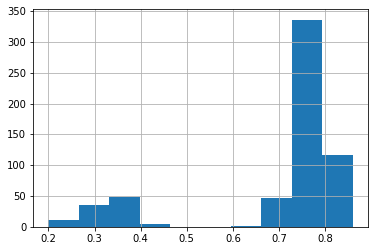

In [4]:
coralData['Coral-CoralNeighbors'].hist()

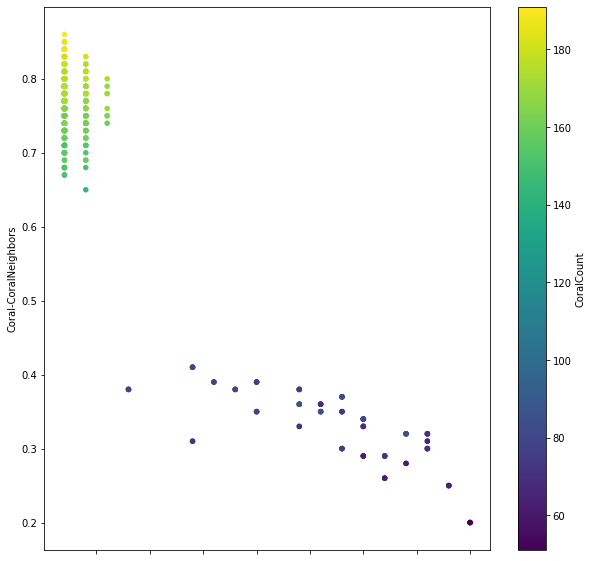

In [12]:
coralData.plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))

In [ ]:
def pandasHistogram(dataframe, variable, by):
    ax = dataframe.hist(column=variable, by=by, figsize=(8,10),
                        layout=(3,1), sharex=True, sharey=True)
    for i,x in enumerate(ax):
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)
        x.set_xlabel(variable, labelpad=20, size=12)
        if i == 1:
            x.set_ylabel("Count", labelpad=50, weight='bold', size=12)
            x.tick_params(axis='x', rotation=0)

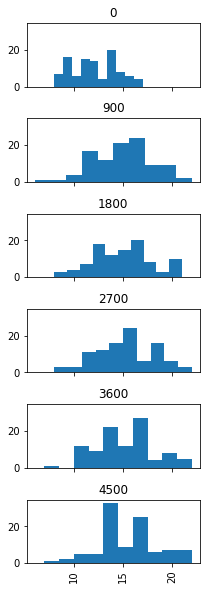

In [5]:
yo = coralData.hist(column='TurfPatchCount', by='Timestep', figsize=(3,10), layout=(6,1), sharex=True, sharey=True)
print(yo)

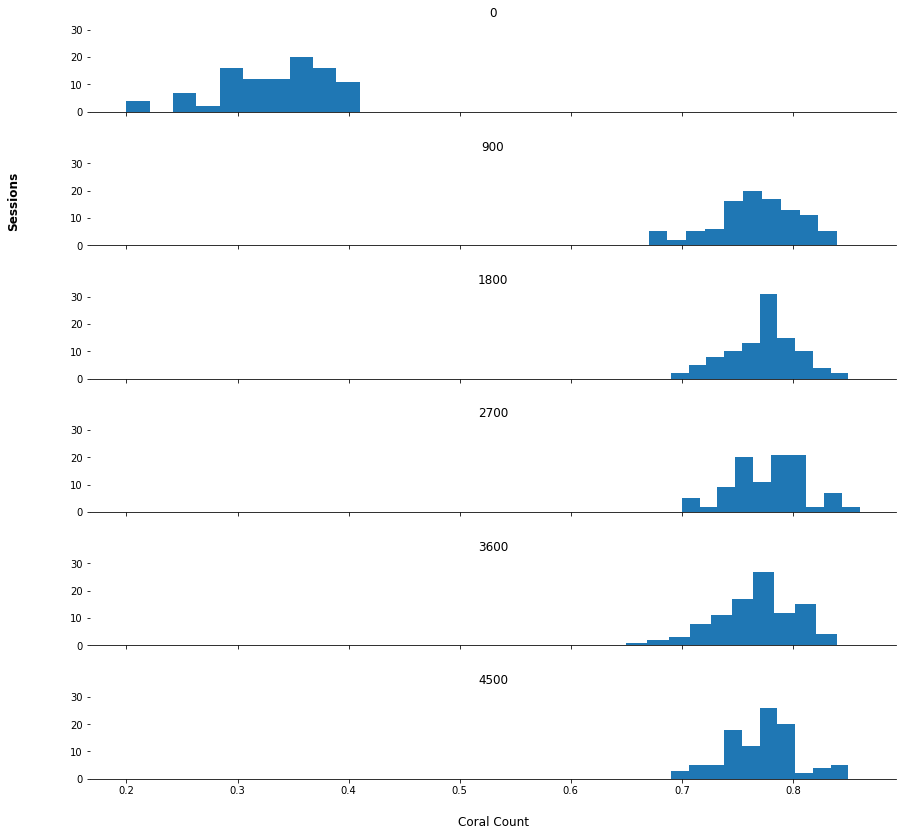

In [165]:
ax = coralData.hist(column='Coral-CoralNeighbors', by='Timestep', figsize=(14,14), layout=(6,1), sharex=True, sharey=True)
for i,x in enumerate(ax):
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    
    # Set x-axis label
    x.set_xlabel("Coral Count", labelpad=20, size=12)
    
    # Set y-axis label
    if i == 1:
        x.set_ylabel("Sessions", labelpad=50, weight='bold', size=12)
    x.tick_params(axis='x', rotation=0)

In [ ]:
gridOption = PathsOfInterest[1].split('/')[3].split('d')[1]
grazing = PathsOfInterest[1].split('/')[4].split('g')[2]

coral, macro, r, d, a, y, time, recordRate, nsim = 
PathsOfInterest[1].split('/')[5].split('-').split('coral').split('macro').split('')

## Browsing Through Output Data Directory/Files

In [ ]:
import os
import numpy as np
import pandas as pd
import re
import tools as tl

In [ ]:
#pd.Series([2]).repeat(len(pd.read_csv(files[1])))

In [ ]:
topDirectory = "./output/15x15"#os.getcwd()
files = [path+'/'+file for path, d, f 
         in os.walk(topDirectory) 
         for file in f if file.endswith(".csv")]
overviewOfRuns = pd.concat([pd.DataFrame([np.array(re.split('[a-z-/.]+',files[n])[1:-1])]) 
           for n in range(0,len(files))])
overviewOfRuns.columns = ['Rows', 'Columns', 'Grid Option', 'Grazing',
                  'Initial Coral Percent', 'Initial Macroalgae Percent',
                      'r', 'd', 'a', 'y', 'Time', 'Record Rate', 'Number of Simulations']
overviewOfRuns = overviewOfRuns.set_index([pd.Series([n for n in range(0,len(files))])])
overviewOfRuns

In [ ]:
df = pd.read_csv(files[2])
df = df.assign(File = np.repeat(2, len(pd.read_csv(files[2]))))
df2 = pd.read_csv(files[3])
df2 = df.assign(File = np.repeat(3, len(pd.read_csv(files[3]))))
pd.concat([df,df2])


# Setting up Grid Options and Checking

In [1]:
from coralModelTable import Reef, Organism, Ocean
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
gridOption = 2 ## 0: random, 1: checkered, 2: blob

rows = 15
columns = 15
NumberOfNodes = rows*columns

In [3]:
coralPercent = .50
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent

if gridOption == 1: #setup checkered
    m = rows + 2
    n = columns + 2
    checkerBoard = np.tile(np.array([[0,1,2],[1,2,0],[2,0,1]]), ((m+2)//3, (n+2)//3))
    
elif gridOption == 2: #setup blob
    
    blobValue = 0 #input system argument
    notBlob = [a for a in [0,1,2] if a != blobValue]
    
    center = (rows/2, columns/2)
    distanceGrid = np.array([Reef.distance([i+.5,j+.5], center)
                             for i in range(0,rows)
                             for j in range(0,columns)])
    maxDistance = np.sort(distanceGrid)[round(coralPercent*NumberOfNodes)]
    blobLocations = (np.where(distanceGrid.reshape(rows,columns) < maxDistance))
    blobLocations = [(blobLocations[0][n],blobLocations[1][n]) for n in range(0,len(blobLocations[0]))]

In [4]:
count = 0
threshold = 1.5
Moorea = Reef()
for i in range(0,rows):        
    for j in range(0,columns):
        if gridOption == 0:
            U = np.random.choice([0,1,2],
                                 p=[coralPercent, turfPercent, algaePercent])                    
        elif gridOption == 1:
            U = checkerBoard[i,j]
        elif gridOption == 2:
            if (i,j) in blobLocations: 
                U = blobValue
            else:
                U = np.random.choice(notBlob,
                                     p=[.5, .5])                    
        node = Organism(type=U, location=[i,j], ID=count)
        Moorea.append(node)
        count = count + 1            
Moorea.generateGraph(threshold)

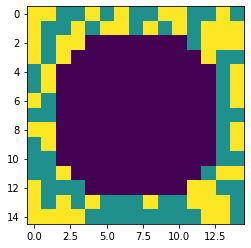

In [5]:
plt.figure()
plt.imshow(np.reshape(np.array([Moorea.nodes[i].type for 
                                i,val in enumerate(Moorea.nodes)]),
                      (rows,columns)))

# How to parallelize

In [166]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':

    with Pool(5) as p:
        print(p.map(f, [1, 2, 3])) #function, argument

[1, 4, 9]


# Parallelizing with CoralModel Table

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from coralModelTable import Reef, Organism, Ocean
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from multiprocessing import Pool

In [3]:
%%time
## Parameters
nProcessors = 4
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 
a=.2
y=.75
g=.4

## Time and Grid Settings

NumberOfSimulations = 50
tf, dt= 200, .1 
NumberOfTimesteps = int(tf/dt)

rows, columns = 15, 15
NumberOfNodes = rows * columns

data = np.zeros((NumberOfTimesteps, NumberOfNodes))
neighbors = np.zeros((NumberOfTimesteps, NumberOfNodes), dtype=object)
def runModel(simulation):
    print('running simulation' + str(simulation))
    Moorea = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([0,1,2],
                                 p=[coralPercent, turfPercent, algaePercent])
            node = Organism(type=U, location=[i,j], ID=count)
            Moorea.append(node)
            count = count + 1            
    Moorea.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        Moorea.roll(r=r, d=d, a=a, g=g, y=y, dt=dt)
    
    if simulation == 0: ## check on progress
        plt.figure()
        plt.imshow(np.reshape(np.array([Moorea.nodes[i].type for
                                        i,val in enumerate(Moorea.nodes)]),(rows,columns)))
    return(Moorea)
        
if __name__ == '__main__':
    
    with Pool(nProcessors) as p:
        results = p.map(runModel, np.arange(NumberOfSimulations))

running simulation0
running simulation12
running simulation4
running simulation8
running simulation5
running simulation9
running simulation13
running simulation1
running simulation6
running simulation14
running simulation10
running simulation2
running simulation7
running simulation15
running simulation11
running simulation3
running simulation16
running simulation20
running simulation24
running simulation28
running simulation17
running simulation21
running simulation25
running simulation29
running simulation18
running simulation22
running simulation26
running simulation30
running simulation19
running simulation23
running simulation27
running simulation31
running simulation32
running simulation36
running simulation40
running simulation44
running simulation33
running simulation37
running simulation41
running simulation45
running simulation34
running simulation38
running simulation42
running simulation46
running simulation35
running simulation39
running simulation43
running simulation47
ru

In [ ]:
results[1].table

# Parallelizing with CoralModel

Other properties implemented:
* reduced 

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from coralModel import Reef, Organism, Ocean
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from multiprocessing import Pool


In [9]:
%%time
## Parameters
nProcessors = 4
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 
a=.2
y=.75
g=.4

## Time and Grid Settings

NumberOfSimulations = 4
tf, dt= 20, .1 
recordRate = 2
NumberOfTimesteps = int(tf/dt)

rows, columns = 15, 15
NumberOfNodes = rows * columns
NumberOfRecordedTimesteps = round(NumberOfTimesteps / recordRate)
data = np.zeros((NumberOfRecordedTimesteps, NumberOfNodes))
neighbors = np.zeros((NumberOfRecordedTimesteps, NumberOfNodes), dtype=object)
recordedTimesteps = np.zeros((NumberOfRecordedTimesteps, 1))


def runModel(simulation):
    print('running simulation' + str(simulation))
    Moorea = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([0,1,2],
                                 p=[coralPercent, turfPercent, algaePercent])
            node = Organism(type=U, location=[i,j], ID=count)
            Moorea.append(node)
            count = count + 1            
    Moorea.generateGraph(threshold)
    
    for t in range(0,NumberOfTimesteps):
        if t % recordRate == 0:
            for n,val in enumerate(Moorea.nodes):
                data[round(t/recordRate),n] = Moorea.nodes[n].type
                neighbors[round(t/recordRate),n] = Moorea.nodes[n].density
                recordedTimesteps[round(t/recordRate)] = n
        Moorea.roll(r=r, d=d, a=a, g=g, y=y, dt=dt)
    
    if simulation == 0: ## check on progress
        plt.figure()
        plt.imshow(np.reshape(np.array([Moorea.nodes[i].type for
                                        i,val in enumerate(Moorea.nodes)]),(rows,columns)))
    
    return(data, neighbors, recordedTimesteps)
        
if __name__ == '__main__':
    
    with Pool(nProcessors) as p:
        results = p.map(runModel, np.arange(NumberOfSimulations))

running simulation0
running simulation1
running simulation2
running simulation3
CPU times: user 21.4 ms, sys: 26 ms, total: 47.3 ms
Wall time: 548 ms


In [22]:
a, b, c = results[1][1][1].mean()
results[1][1][1].mean()

array([0.96444444, 2.05777778, 4.19555556])

In [23]:
a

0.9644444444444444

In [24]:
b

2.057777777777778

In [ ]:
data, neighbors = 0,1
def pullInfo(simulation):
    
    print('quantifying simulation' + str(simulation))
    count = 0
    
    simulation_rec = np.zeros(NumberOfRecordedTimesteps)
    timestep_rec = np.zeros(NumberOfRecordedTimesteps)
    
    C = np.zeros(NumberOfRecordedTimesteps)
    M = np.zeros(NumberOfRecordedTimesteps)
    T = np.zeros(NumberOfRecordedTimesteps)
    CP = np.zeros(NumberOfRecordedTimesteps)
    MP = np.zeros(NumberOfRecordedTimesteps)
    TP = np.zeros(NumberOfRecordedTimesteps)
    #CN =     #PULL FROM results[2]
    #MN = 
    #TN =
    
    for timestep in range(0,NumberOfRecordedTimesteps):
        
        image = results[simulation][data][timestep]
        neighborCount = results[simulation][neighbors][timestep]
        
        simulation_rec[count] = str(simulation)
        timestep_rec[count] = str(timestep * recordRate)
        
        if C[t,s] == 0:
            CP[count], AP[count], TP[count], MP[count] = [0,0,0,0]
            Msim[count], Tsim[count], Csim[count] = [0,0,0]
            CNsim[count], CNrsim[count] = [0,0]
            
        else:
            C[count] = np.count_nonzero(image==0)
            T[count] = np.count_nonzero(image==1)
            M[count] = np.count_nonzero(image==2)
            CP[count], AP[count], TP[count], MP[count] = patchCounts(image,rows)
            
            CN[count], TN[count], MN[count] = ## use function
            
        count = count + 1
        
        ##combine via pandas
        
        snapshot = results[simulation][data][timestep]

### Format of results under parallelization

In [17]:
results[2][0][1]

array([0., 0., 0., 1., 0., 0., 0., 2., 2., 1., 1., 0., 1., 2., 2., 1., 0.,
       0., 0., 0., 0., 2., 1., 1., 2., 2., 1., 1., 1., 0., 1., 2., 1., 0.,
       0., 0., 2., 2., 2., 2., 1., 0., 1., 0., 2., 0., 2., 1., 2., 2., 0.,
       1., 2., 0., 1., 1., 1., 0., 2., 1., 1., 0., 2., 0., 2., 2., 2., 1.,
       1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 0., 2., 0., 2., 2., 2., 2.,
       1., 1., 0., 2., 1., 1., 0., 2., 2., 0., 0., 0., 1., 2., 2., 1., 2.,
       1., 0., 0., 1., 0., 1., 2., 1., 0., 0., 1., 2., 2., 1., 1., 0., 0.,
       0., 0., 1., 1., 2., 0., 0., 0., 1., 2., 2., 2., 1., 0., 1., 0., 2.,
       0., 0., 1., 0., 2., 2., 0., 0., 1., 2., 0., 1., 2., 0., 1., 1., 2.,
       1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 0., 1., 1., 2., 0., 2.,
       0., 0., 1., 2., 1., 2., 2., 1., 1., 0., 2., 2., 2., 2., 2., 0., 0.,
       1., 1., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 2., 2., 0., 2., 0., 0., 2., 2., 2., 0., 0.,
       0., 1., 1., 0.])

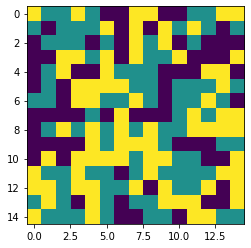

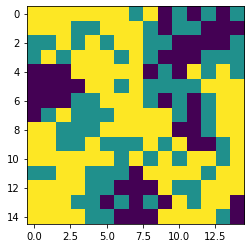

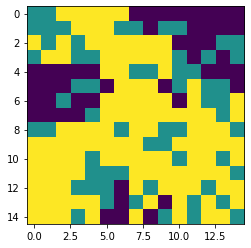

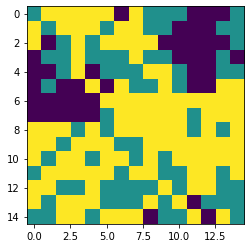

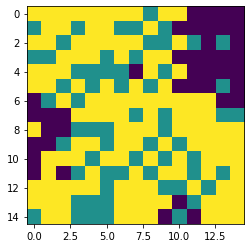

In [14]:
for i in np.arange(0,500,100):
    plt.figure()
    plt.imshow(np.reshape(results[5][i,:],(15,15)))

# Possible Extractions

#### Currently
* Number of Patches done via `patchCounts(sim,rows)`
* Species count via  `np.count_nonzero(step==2)` (currently written in as "sim"


#### Other table
* Want something that includes summary (age of coral death or algae death)



In [33]:
simulation = 2
matrixData = 0
timestep = 2
results[simulation][matrixData].shape

(10, 225)

In [34]:
results[simulation][matrixData][timestep].shape

(225,)

## Number of Each Species 

66 73 86


225

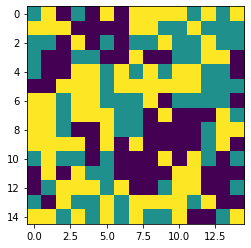

In [28]:
image = results[simulation][matrixData][timestep]
plt.imshow(shaper(image,rows))
print(np.count_nonzero(image==0),
      np.count_nonzero(image==1),
      np.count_nonzero(image==2))
63+77+85

## Number of Patches Count

[[1. 2. 0. 1. 0. 2. 0. 2. 2. 2. 2. 1. 2. 1. 2.]
 [2. 2. 2. 0. 0. 0. 0. 2. 2. 1. 1. 2. 1. 1. 1.]
 [1. 1. 0. 2. 0. 1. 0. 1. 1. 2. 1. 1. 2. 1. 1.]
 [1. 0. 0. 1. 1. 0. 0. 2. 0. 0. 1. 1. 2. 2. 0.]
 [1. 0. 0. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 0.]
 [0. 0. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [2. 2. 1. 2. 2. 1. 1. 1. 2. 0. 1. 1. 1. 1. 0.]
 [2. 2. 1. 2. 2. 2. 1. 1. 0. 2. 0. 0. 0. 2. 1.]
 [2. 2. 1. 0. 0. 2. 1. 1. 0. 0. 0. 0. 1. 2. 2.]
 [2. 2. 2. 2. 0. 2. 0. 2. 0. 0. 0. 0. 1. 2. 0.]
 [1. 2. 1. 1. 0. 1. 0. 0. 0. 2. 0. 2. 1. 0. 1.]
 [0. 2. 0. 2. 1. 1. 0. 0. 0. 0. 2. 2. 0. 0. 0.]
 [0. 1. 2. 2. 2. 1. 2. 0. 0. 1. 2. 2. 0. 0. 1.]
 [1. 0. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 0. 0.]
 [2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 0. 0. 1. 2.]]
9 3 17 8


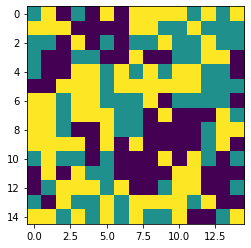

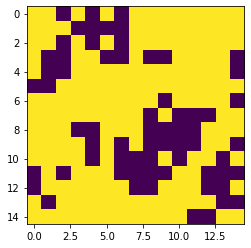

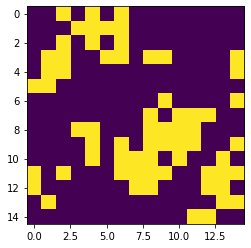

In [29]:
from ripser import ripser, lower_star_img

def shaper(df, rows):
    df = np.reshape(df, (-1, rows))
    return(df)

def binary(df,ones='coral'):
    with np.errstate(divide='ignore',invalid='ignore'):
        if ones == 'coral':
            df = np.nan_to_num(df/df)
        elif ones == 'turf':
            df = (df-1)**2
        elif ones == 'macro':
            df = np.nan_to_num((df-2)**2/(df-2)**2)
    return(df)

def tdaPrep(df, rows, ones='coral'):
    df = binary(df,ones)
    dfi = 1-df   
    df = shaper(df,rows)
    dfi = shaper(dfi,rows)
    return(df, dfi)


def patchCounts(image, rows):

# TDA measure for coral:
    df, dfi = tdaPrep(image, rows, ones='coral')
    countCoralPatches = len(lower_star_img(df))
    countAlgaePatches = len(lower_star_img(dfi))

# TDA meaure for turf:
    df, dfi = tdaPrep(image, rows, ones='turf')
    countTurfPatches = len(lower_star_img(df))

# TDA measure for macroalgae:
    df, dfi = tdaPrep(image, rows, ones='macro')
    countMacroPatches = len(lower_star_img(df))
    
    return(countCoralPatches, countAlgaePatches, countTurfPatches, countMacroPatches)

print(shaper(image,rows))

CP,AP,TP, MP = patchCounts(image, rows)
print(CP,AP,TP, MP)

df,dfi = tdaPrep(image,rows, ones='coral')
plt.figure()
plt.imshow(shaper(image,rows))
plt.figure()
plt.imshow(df)
plt.figure()
plt.imshow(dfi)

In [5]:
results[2][0][1]

array([0., 0., 0., 1., 1., 0., 0., 2., 0., 2., 1., 0., 2., 2., 2., 1., 1.,
       0., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 0., 0., 2., 1., 0.,
       1., 0., 0., 2., 2., 1., 1., 1., 0., 0., 1., 0., 1., 2., 0., 2., 0.,
       1., 2., 0., 1., 1., 0., 0., 2., 0., 0., 1., 2., 0., 1., 2., 1., 1.,
       1., 2., 0., 1., 1., 1., 2., 0., 1., 1., 1., 0., 0., 0., 2., 2., 1.,
       1., 0., 0., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2.,
       1., 0., 1., 1., 0., 0., 2., 2., 0., 0., 1., 1., 2., 1., 1., 0., 2.,
       1., 0., 1., 1., 2., 1., 0., 0., 1., 1., 2., 1., 1., 0., 0., 1., 2.,
       0., 1., 1., 0., 2., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 2.,
       1., 2., 1., 0., 2., 0., 2., 1., 1., 2., 1., 0., 0., 2., 1., 0., 2.,
       1., 1., 2., 2., 1., 2., 2., 1., 1., 0., 2., 2., 2., 1., 2., 0., 0.,
       2., 0., 0., 2., 2., 0., 1., 2., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 2., 0., 1., 0., 1., 0., 2., 0., 2., 0., 0., 2., 1., 2., 1., 1.,
       2., 0., 1., 1.])

# Automate

### Modulo Operator for limiting when data is pulled

In [8]:
for t in range(0,301):
    if t % 100 == 0:
        print(t)

0
100
200
300


### Running Coral Model, exploring available data inside loop

In [62]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from coralModel import Reef, Organism, Ocean
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from multiprocessing import Pool

nProcessors = 4
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 
a=.2
y=.75
g=.4
gridOption = 0


NumberOfSimulations = 10
tf, dt= 100, .1 
recordRate = 200
NumberOfTimesteps = int(tf/dt)
rows, columns = 15, 15
NumberOfNodes = rows * columns
NumberOfRecordedTimesteps = round(NumberOfTimesteps / recordRate)

## Grid Options Setup
if gridOption == 1:
    checkerBoard = generateCheckerBoard(rows, columns)

elif gridOption == 2:
    blobLocations, notBlob = generateBlob(rows, columns, blobValue, coralPercent)

In [64]:
%%time

def createReef():
    Moorea = Reef()
    count = 0   
    for i in range(0,rows):
        for j in range(0,columns):
            if gridOption == 0:
                U = np.random.choice([0,1,2], p=[coralPercent, 
                                                 turfPercent, algaePercent])
            elif gridOption == 1:
                U = checkerBoard[i,j]
                
            elif gridOption == 2:
                if (i,j) in blobLocations: 
                    U = blobValue
                else:
                    U = np.random.choice(notBlob, p=[.5, .5])
            node = Organism(type=U, location=[i,j], ID=count)
            Moorea.append(node)
            count = count + 1
    return(Moorea)
    
def runModel(simulation):
    
    print('running simulation' + str(simulation))
    Moorea = createReef()
    Moorea.generateGraph(threshold) 
    
    for timestep in range(0,NumberOfTimesteps):
        
        ## Recording at defined record rate
        
        if timestep % recordRate == 0:
            for n,val in enumerate(Moorea.nodes):
                data[round(timestep/recordRate),n] = Moorea.nodes[n].type
                neighbors[round(timestep/recordRate),n] = Moorea.nodes[n].density
            
                
        ## Run model        
        Moorea.roll(r=r, d=d, a=a, g=g, y=y, dt=dt)
        
    return(Moorea)

if __name__ == '__main__':
    
    with Pool(nProcessors) as p:
        results = p.map(runModel, np.arange(NumberOfSimulations))

running simulation2
running simulation1
running simulation0
running simulation3
running simulation4
running simulation5
running simulation6
running simulation7
running simulation8
running simulation9
CPU times: user 29.3 ms, sys: 25.3 ms, total: 54.6 ms
Wall time: 4.74 s


In [65]:
results

In [ ]:
Moorea = results[1]

CN = np.array([Moorea.nodes[n].density/
               Moorea.nodes[n].density.sum()
               for n,val in enumerate(Moorea.nodes)
               if Moorea.nodes[n].type == 0]).mean(axis=0)[0]
TN = np.array([Moorea.nodes[n].density/
               Moorea.nodes[n].density.sum()
               for n,val in enumerate(Moorea.nodes)
               if Moorea.nodes[n].type == 1]).mean(axis=0)[1]
MN = np.array([Moorea.nodes[n].density/
               Moorea.nodes[n].density.sum()
               for n,val in enumerate(Moorea.nodes)
               if Moorea.nodes[n].type == 2]).mean(axis=0)[2]

In [76]:
[results[1].nodes[2].density/results[1].nodes[2].density.sum()][0][1]

0.8

In [118]:
## via for loop
%time

grid = np.zeros(225)
neigbors = np.zeros(225)

for n,val in enumerate(results[1].nodes):
    grid[n] = np.array(results[1].nodes[n].type)
    neighbors[n] = np.array(results[1].nodes[n].density/results[1].nodes[n].density.sum())
type(grid[1])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


numpy.float64

In [126]:
#### via list comp
%time

grid = np.array([results[1].nodes[n].type for n,val in enumerate(results[1].nodes)])

neighbors = np.array([results[1].nodes[n].density/results[1].nodes[n].density.sum()
                      for n,val in enumerate(results[1].nodes)])

type(grid[1])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


numpy.int64

In [ ]:
### For inside loop

if timestep % recordRate == 0:
    grid = np.array([results[1].nodes[n].type for n,val in enumerate(results[1].nodes)])
    neighbors = np.array([results[1].nodes[n].density for n,val in enumerate(results[1].nodes)])
    

### Creating and Concating Pandas dataframes

In [26]:
import pandas as pd

In [53]:
data1 = [3,2,3]
data2 = [4,2,3]

In [54]:
## Each timestep create a new row
df1 = pd.DataFrame([data1])
df2 = pd.DataFrame([data2])
df2

,0,1,2
0,4,2,3


In [55]:
df = pd.concat([df1, df2])
df

,0,1,2
0,3,2,3
0,4,2,3


In [56]:
df.columns = ['a','b','c']
df

,a,b,c
0,3,2,3
0,4,2,3
